# Sentimental Analysis on Broadband Internet Connectivity

The objective of this section is to perform sentiment analysis on a series of abstracts of publications about devolution. Sentiment analysis in natural language programming is method of attempting to extract the mood or sentiment of a text, be it a sentence, paragraph, or entire corppus. This is usually achieved by using machine learning methods.

Machine learning can be considered as a branch of artificial intelligence. It entails the development and implementation of algorithms which allow a computer to iteratively or otherwise improve its performance on a given dataset by some predefined performance measure.

In the case of sentiment analysis, the performance measure can be accuracy in pulling out sentiment from a given text. We are going to implement a pretrained sentiment analysis module in python on the text. But first, it is important to load and understand the data. The data was obtained from lens.org and entails paper metadata for 15,614 publications on devolution.

We first start by importing different libraries and modules in Python which will be useful for our work. Python is an open source programming language developed by several independent teams and individuals, with varying interests. Thus, the relevant packages have to be installed and "called" to Python separately. It is helpful to think of python as not a specialised, fixed programming language (a hardware shop) but more as a general collection of programming algorithms which share the same syntax (a market or a mall).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import wordcloud 
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import io
from sklearn.decomposition import TruncatedSVD
from textblob import TextBlob
from collections import Counter
from langdetect import detect

We explain the various libraries and modules below:

Matplotlib: Mathematical Plot Library. This is a library used to make plots in Python, useful for visualisation Python Plot (pyplot) is a module in Matplotlib.

Pandas: This is a crucial data analysis tool in Python, used for the manipulation of data arranged in spreadsheet form. It is the "excel" of Python, with a bit more functionality.

nltk: Natural Language Tool Kit. This is a python library used for natural language processing. For our purposes here, we will use:

 >>>"stopwords", which is an nltk module used to remove common english words such as "he","or" from the dataset since they count as noise.

 >>>"PorterStemmer": which is used to remove superfluous characters to identify the root of the word: for example, from the word "taken" the "n" is removed and the root of the word becomes "take".

 wordcloud: Wordcloud is a python library used for counting the most frequent words in a text or corpus of text. The words are then represented graphically in terms of a wordcloud. We use the following wordcloud modules:
 >>> WordCloud: This is the counting algorithm. We will pass the entire corpus through the function.
 >>>STOPWORDS: This is used to remove commonly occurring English words such as "she", "it", "was".
 >>>ImageColorGenerator: This is the function which will carry out the graphical representation of the data.

TensorFlow: This is a library used in machine learning, specifically in the design, training and implementation of neural networks, which are a special kind of machine learning algorithm. The neural networks  process information in the form of high dimensional matrices called Tensors. The tensors move("flow") between layers of the neural network. See (https://playground.tensorflow.org ) for a visualisation of the neural network with information flowing.

Numpy: Numeric Python. This is a python library useful for the manipulation of matrices.

files: This is a module in google.colab library used for the uploading of files into google colab. We use the Google Cluster for the processing of our data. Google Colab can be thought of as the "Google Drive" of High Performance Computing.

sklearn: SciKit Learn Sci Kit Learn is an important machine learnng library in python. It contains most of the "classical" approaches to machine learning as modules. We are going to use:

>>>TfidfVectorizer: Term Frequency Inverse Document Frequency Vectorizer. This is a module used to convert words into numbers since at a fundamental level, computers only understand numbers. TFIDF is a specific algorithm used to suppress the importance of commonly occurring words and phrases like "boy"
and to amplify the importance of less occuring words like "inequality". In essence, the vector for "boy" is smaller than the vector used to represent "inequality".

>>>KMeans: This is a clustering method in SciKit- Learn. It achieves this by finding averages (centroids) which separate the data using as optimum a separation as possible.

And then then read our csv file to have an idea of its content

In [2]:
lens1=pd.read_csv('lens-export.csv')
lens1

,Lens ID,Title,Date Published,Publication Year,Publication Type,Source Title,ISSNs,Publisher,Source Country,Author/s,...,Funding,Source URLs,External URL,PMID,DOI,Microsoft Academic ID,PMCID,Cites Patent Count,References,Scholarly Citation Count
0,000-001-818-922-365,Mobile Learning: A Good Practice☆,NaN,2013.0,journal article,Procedia - Social and Behavioral Sciences,18770428,Elsevier BV,NaN,Dawood Salim Al Hamdani,...,NaN,https://www.sciencedirect.com/science/article/...,http://dx.doi.org/10.1016/j.sbspro.2013.10.386,NaN,10.1016/j.sbspro.2013.10.386,1991222021,NaN,0,002-567-728-881-024; 020-158-921-760-203; 030-...,21
1,000-001-857-097-580,Design and Development of an IoT Gateway for S...,NaN,2019.0,journal article,IEEE Internet of Things Journal,23722541; 23274662,Institute of Electrical and Electronics Engine...,United States,Aditya Nugur; Manisa Pipattanasomporn; Murat K...,...,U.S. Department of Energy,https://ieeexplore.ieee.org/document/8567940/ ...,http://dx.doi.org/10.1109/jiot.2019.2926099,NaN,10.1109/jiot.2019.2926099,2905488906,NaN,0,008-303-022-358-089; 010-642-302-538-381; 020-...,9
2,000-006-347-906-643,Gaming out online: Black lesbian identity deve...,2017-11-22,2017.0,journal article,Journal of lesbian studies,15403548; 10894160,Routledge,United States,Kishonna L. Gray,...,NaN,https://www.ncbi.nlm.nih.gov/pubmed/29166214 h...,http://dx.doi.org/10.1080/10894160.2018.1384293,29166214,10.1080/10894160.2018.1384293,2770819280,NaN,0,001-948-449-325-458; 006-798-757-630-340; 013-...,34
3,000-007-908-899-389,Flow oriented channel assignment for multi-rad...,2010-04-13,2010.0,journal article,EURASIP Journal on Wireless Communications and...,16871499; 16871472,Springer Science and Business Media LLC,Germany,Fei Ye; Sumit Roy; Zhisheng Niu,...,NaN,https://jwcn-eurasipjournals.springeropen.com/...,http://dx.doi.org/10.1155/2010/930414,NaN,10.1155/2010/930414,2082145422,NaN,0,000-762-730-163-989; 007-173-351-969-594; 008-...,3
4,000-020-057-796-424,A four-part working bibliography of neuroethic...,2015-02-15,2015.0,journal article,"Philosophy, ethics, and humanities in medicine...",17475341,BioMed Central,United Kingdom,Martina Darragh; Liana Buniak; James Giordano,...,NaN,https://core.ac.uk/display/81548065 https://0-...,http://dx.doi.org/10.1186/s13010-015-0022-0,25890310,10.1186/s13010-015-0022-0,2120768025,PMC4334407,0,000-273-484-579-438; 000-396-084-056-750; 000-...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27982,199-843-167-438-681,Intra-regional Internet connectivity still an ...,2005-05-03,2005.0,journal article,Telecommunications Policy,03085961,Elsevier Limited,United Kingdom,Carlos Silva Ponce de León,...,NaN,https://www.sciencedirect.com/science/article/...,https://www.sciencedirect.com/science/article/...,NaN,NaN,2089022462,NaN,0,017-740-669-796-890; 021-865-515-334-70X; 029-...,2
27983,199-867-426-663-952,Patient perspectives with telehealth visits in...,2020-10-16,2020.0,NaN,NaN,NaN,NaN,NaN,Aniruddha Singh; Natalie Mountjoy; Douglas M. ...,...,NaN,https://www.ncbi.nlm.nih.gov/pubmed/33385234,https://www.ncbi.nlm.nih.gov/pubmed/33385234,NaN,NaN,3115014976,NaN,0,001-088-916-508-943; 001-579-662-898-318; 006-...,0
27984,199-903-195-161-079,Mobilna tehnologija i njezin utjecaj na ponaša...,2017-02-17,2017.0,NaN,NaN,NaN,NaN,NaN,Ana-Marija Mičuda,...,NaN,https://repozitorij.unin.hr/islandora/object/u...,https://zir.nsk.hr/islandora/object/unin%3A1255,NaN,NaN,2593397295,NaN,0,NaN,0
27985,199-953-350-520-47X,Consideration about the Management Method of t...,2004-05-13,2004.0,conference proceedings,NaN,NaN,NaN,NaN,Shimada Hideki; 島田 秀輝; 北須賀 輝明; Kitasuka Teruak...,...,NaN,http://ci.nii.ac.jp/naid/110002914391,http://ci.nii.ac.jp/naid/110002914391,NaN,NaN,2344444292,NaN,0,NaN,0


From the data set we can see that the dataframe contains rich and varied data including the paper title, author abstract, thematic concerns, link to paper, among others.

We isolate the abstract column

In [3]:
lens2=lens1['Abstract']
lens2

0        Abstract With advances in learning technology ...
1        Due to the depletion of energy resources and i...
2        As gaming culture continues to marginalize wom...
3        We investigate channel assignment for a multic...
4        Background; Moral philosophy and psychology ha...
                               ...                        
27982    Abstract A review of market trends impacting t...
27983    BACKGROUND The rise of COVID-19 and the issue ...
27984    Day by day mobile technology continues to adva...
27985                                                  NaN
27986    In addition to performing the function for whi...
Name: Abstract, Length: 27987, dtype: object

## Data Cleaning

We need to clean our data before we can pipe it through our clustering and sentiment analysis algorithms.
The first step is to eliminate the datapoints with null values or Not a Number (NaN)

In [4]:
lens3=lens2.dropna()
lens3

0        Abstract With advances in learning technology ...
1        Due to the depletion of energy resources and i...
2        As gaming culture continues to marginalize wom...
3        We investigate channel assignment for a multic...
4        Background; Moral philosophy and psychology ha...
                               ...                        
27981    Owing to the fact that WiFi is the cheapest fo...
27982    Abstract A review of market trends impacting t...
27983    BACKGROUND The rise of COVID-19 and the issue ...
27984    Day by day mobile technology continues to adva...
27986    In addition to performing the function for whi...
Name: Abstract, Length: 27355, dtype: object

We then convert the edited csv file into a dataframe for easy computation.
Since some of the rows have been eliminated during dropping, the index has to be reset.

In [5]:
lens3=pd.DataFrame(lens3) #Convert dataframe
lens4=lens3.reset_index(drop=True) #reset index
lens4 #confirm the changes

,Abstract
0,Abstract With advances in learning technology ...
1,Due to the depletion of energy resources and i...
2,As gaming culture continues to marginalize wom...
3,We investigate channel assignment for a multic...
4,Background; Moral philosophy and psychology ha...
...,...
27350,Owing to the fact that WiFi is the cheapest fo...
27351,Abstract A review of market trends impacting t...
27352,BACKGROUND The rise of COVID-19 and the issue ...
27353,Day by day mobile technology continues to adva...


We can see that the series contains some Abstracts published in other languages, which will be problematic for the algorithms. We thus need to make sure that all abstracts are written in one language (English). To do that, we have to use a python library known as **Langdetect**. This is preceded by creating a new column of _"language"_.

Lang detect is a pretrained algorithm which has learned to classify text according to the language in which it is written. We install it and run it through the abstracts. We now install the package:

In [6]:
lens4['Language']='' #create "language" column
lens4

,Abstract,Language
0,Abstract With advances in learning technology ...,
1,Due to the depletion of energy resources and i...,
2,As gaming culture continues to marginalize wom...,
3,We investigate channel assignment for a multic...,
4,Background; Moral philosophy and psychology ha...,
...,...,...
27350,Owing to the fact that WiFi is the cheapest fo...,
27351,Abstract A review of market trends impacting t...,
27352,BACKGROUND The rise of COVID-19 and the issue ...,
27353,Day by day mobile technology continues to adva...,


We then run langdetect through the entire dataframe and have it classify the entire corpus, and write down the language in which the abstract is written. This is done by using a loop. Loops are conditional statements which allow a computer to repeat a given task until the condition is violated. If the condition is violated then the loop terminates.

In [7]:
for i in range(27355):
  lens4['Language'].loc[i]=detect(str(lens1['Abstract'].loc[i]))

We now only take abstracts written in English and assign them to the "Language" column

In [8]:
lens5=lens4[lens4.Language == 'en']
lens5

,Abstract,Language
0,Abstract With advances in learning technology ...,en
1,Due to the depletion of energy resources and i...,en
2,As gaming culture continues to marginalize wom...,en
3,We investigate channel assignment for a multic...,en
4,Background; Moral philosophy and psychology ha...,en
...,...,...
27349,WLAN and GPRS are used widely wireless network...,en
27350,Owing to the fact that WiFi is the cheapest fo...,en
27351,Abstract A review of market trends impacting t...,en
27352,BACKGROUND The rise of COVID-19 and the issue ...,en


Since it has worked, we can isolate the "Abstract" column

In [9]:
lens6=lens5['Abstract']
lens6

0        Abstract With advances in learning technology ...
1        Due to the depletion of energy resources and i...
2        As gaming culture continues to marginalize wom...
3        We investigate channel assignment for a multic...
4        Background; Moral philosophy and psychology ha...
                               ...                        
27349    WLAN and GPRS are used widely wireless network...
27350    Owing to the fact that WiFi is the cheapest fo...
27351    Abstract A review of market trends impacting t...
27352    BACKGROUND The rise of COVID-19 and the issue ...
27353    Day by day mobile technology continues to adva...
Name: Abstract, Length: 26582, dtype: object

Since this is a sentimental analysis problem, we need to suppress words with less significance such as "and", "it", "the", etc. To do that, we convert all the abstracts into a single text and then apply a python library **"STOPWORDS"**

In [10]:
text="".join(data for data in lens5['Abstract'])

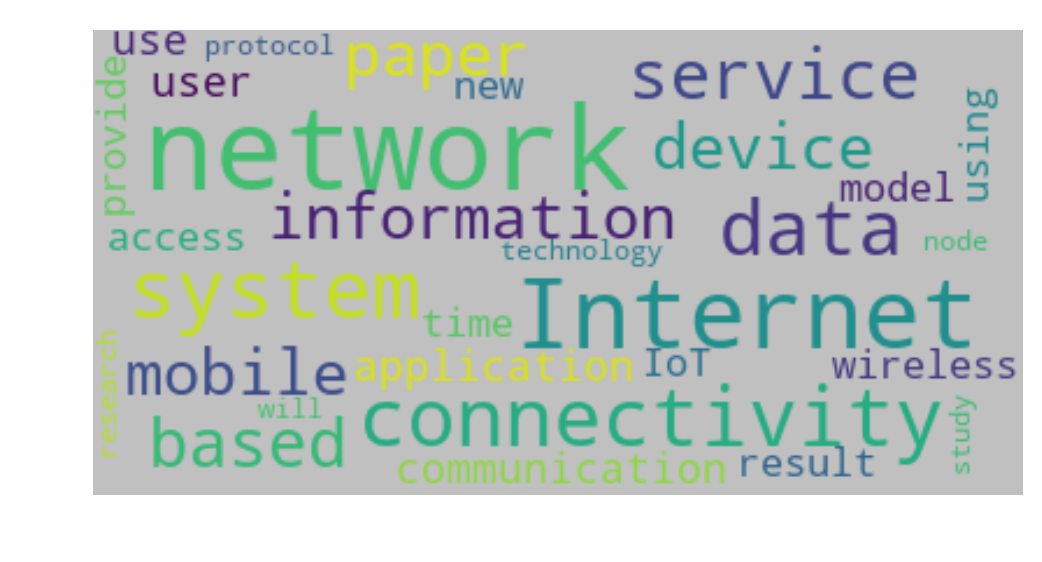

<Figure size 432x288 with 0 Axes>

In [153]:
stopwords = set(STOPWORDS) #Suppress the common words like 'it', 'and','he' etc
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, \
                      max_words=30, background_color="silver",collocations=False).generate(text) #Classify words according to their frequency
plt.figure(dpi=200)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('connectivity_wordcloud.png')

As discussed, computers only understand numbers. We therefore need to convert our words into numbers. Specifically, our words will be an array of numbers known as a vector. These vectors live in a multidimensional vector space. A phrase, paragraph or corpus can be seen as a combination of these vectors.

We instantiate our converter, our "vectorizer". Specifically, it is the TFIDF vectorizer as discussed above.

In [12]:
vectorizer=TfidfVectorizer(stop_words='english') #to instantiate reversal of frequency based on less significant words

We then convert the words into vectors. We invoke English stopwords.

In [13]:
X2=vectorizer.fit_transform(lens6)
X2

<26582x90435 sparse matrix of type '<class 'numpy.float64'>'
	with 2372922 stored elements in Compressed Sparse Row format>

In [14]:
X2.shape

(26582, 90435)

## K-means Clustering

We are going to use the K-means clustering algorithm

The matrix is 26587 by 90344 matrix meaning that there are 26587 words which have been converted into 90344 dimensional vectors. These will be the words which will be useful for our classification.

We can now perform cluster separation. We instantiate the clustering algorithm. The number of clusters(n_clusters) is choosen as 3.However, a scientific way of establishing this value is by trying with several reasonable values and then settling on where they converge (**a kink in the curve**) in a method known as **elbow method**. This is an intensive process and was performed once and the value established as 3. The elbow method code is commented out.
The initialization algorithm is k-means++ is an adaptive method for finding the most optimum initial cluster center. max_iter is the maximum number of iterations that the algorithm needs to implement.

In [15]:
'''Sum_of_squared_distances = [] #Instantiate empty list
K = range(1,5,1)              #Number of types of clusters
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)            #fit the data
    Sum_of_squared_distances.append(km.inertia_) #calculate optimum'''

'Sum_of_squared_distances = [] #Instantiate empty list\nK = range(1,5,1)              #Number of types of clusters\nfor k in K:\n    km = KMeans(n_clusters=k)\n    km = km.fit(X2)            #fit the data\n    Sum_of_squared_distances.append(km.inertia_) #calculate optimum'

Plot the elbow method curve

In [16]:
'''plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()'''

"plt.plot(K, Sum_of_squared_distances, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Sum_of_squared_distances')\nplt.title('Elbow Method For Optimal k')\nplt.show()"

Use the K-means clustering algorithm from scikit learn to train the model.

In [17]:
true_k=3
model=KMeans(n_clusters=true_k,init="k-means++",max_iter=100,n_init=1)
model.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

And then we display our clusters

In [19]:
for i in range(true_k):
 print('Cluster %d:' % i),    #%i prints group of words associated with cluster and %d prints the cluster
 for ind in order_centroids[i, :10]:
  print(' %s' % terms[ind])

Cluster 0:
 internet
 information
 data
 social
 connectivity
 use
 learning
 study
 technology
 research
Cluster 1:
 iot
 devices
 things
 smart
 internet
 data
 security
 network
 connectivity
 applications
Cluster 2:
 network
 networks
 mobile
 wireless
 routing
 internet
 nodes
 protocol
 connectivity
 performance


After training the clustering algorithm, we use it to classify the abstracts.

In [20]:
y_clf=model.fit_predict(X2)

In [21]:
lens=pd.DataFrame(y_clf)

In [22]:
lens=lens.groupby([0]).size().reset_index(name="number")
lens

,0,number
0,0,8261
1,1,15946
2,2,2375


We see the relative sizes of the clusters above.

## Data Visualisation

Visualisation poses a challenge for high dimensional objects. We saw that each word(represented by a vector) has about 90000 dimensions. To know the dimensionality of each Abstract, we need only know the shape of the matrix:

In [23]:
X2.shape

(26582, 90435)

As we can see, the abstracts have very large dimensions of around 90000

We need to project the 90000 dimensional abstracts onto two dimensions. We will use a sampling method known as Singular Value decomposition to reduce our dataset. This can be gotten from the SciKit Learn library, Truncated SVD. 

It is then instantiated:

In [24]:
svd=TruncatedSVD(n_components=2)

We then project it on two dimensions and label it X3

In [25]:
X3=svd.fit_transform(X2)
X3

array([[ 0.21390574, -0.09346082],
       [ 0.20948133, -0.0320777 ],
       [ 0.05442603, -0.04580263],
       ...,
       [ 0.08418409, -0.0329949 ],
       [ 0.06955475, -0.03431324],
       [ 0.22180015, -0.04399603]])

We can see that the matrix has been reduced to two dimensions and it is thus plottable:

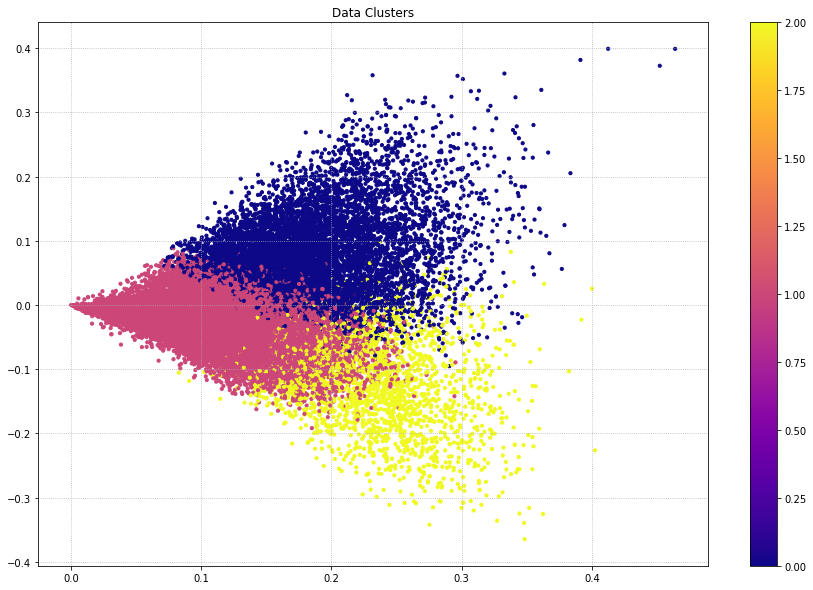

In [152]:
plt.figure(figsize=(15, 10))
plt.scatter(X3[:,0], X3[:,1], c=y_clf, s=10, cmap='plasma')
plt.colorbar()
plt.title('Data Clusters')
plt.grid(which='both', linestyle=':')
plt.savefig('Connectivity.png')

We see that we have obtained clusters, although the separation between the three is fuzzy.

Our aim is to understand the opinion towards Internet connectivity in the papers whether positive, negative or neutral. To do that, we perfrom sentimental analysis using python's pre-defined library known as TextBlob.
We first create a new column known as 'sentiment'

In [27]:
lens5['Sentiment']=""
lens5

/home/makavelli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Abstract,Language,Sentiment
0,Abstract With advances in learning technology ...,en,
1,Due to the depletion of energy resources and i...,en,
2,As gaming culture continues to marginalize wom...,en,
3,We investigate channel assignment for a multic...,en,
4,Background; Moral philosophy and psychology ha...,en,
...,...,...,...
27349,WLAN and GPRS are used widely wireless network...,en,
27350,Owing to the fact that WiFi is the cheapest fo...,en,
27351,Abstract A review of market trends impacting t...,en,
27352,BACKGROUND The rise of COVID-19 and the issue ...,en,


In [28]:
lens6=lens5.reset_index(drop=True)
lens6

,Abstract,Language,Sentiment
0,Abstract With advances in learning technology ...,en,
1,Due to the depletion of energy resources and i...,en,
2,As gaming culture continues to marginalize wom...,en,
3,We investigate channel assignment for a multic...,en,
4,Background; Moral philosophy and psychology ha...,en,
...,...,...,...
26577,WLAN and GPRS are used widely wireless network...,en,
26578,Owing to the fact that WiFi is the cheapest fo...,en,
26579,Abstract A review of market trends impacting t...,en,
26580,BACKGROUND The rise of COVID-19 and the issue ...,en,


We now create a loop that goes through all the 26583 rows to perfrom sentimental analysis and then stores in the 'sentiment' column

In [29]:
for i in range(26582):
  lens6["Sentiment"].loc[i]=TextBlob(str(lens6['Abstract'].loc[i])).polarity

In [30]:
lens6

,Abstract,Language,Sentiment
0,Abstract With advances in learning technology ...,en,0.266667
1,Due to the depletion of energy resources and i...,en,0.0768908
2,As gaming culture continues to marginalize wom...,en,0.016369
3,We investigate channel assignment for a multic...,en,0.232804
4,Background; Moral philosophy and psychology ha...,en,0.0111008
...,...,...,...
26577,WLAN and GPRS are used widely wireless network...,en,0.104103
26578,Owing to the fact that WiFi is the cheapest fo...,en,0.0437459
26579,Abstract A review of market trends impacting t...,en,-0.0388889
26580,BACKGROUND The rise of COVID-19 and the issue ...,en,-0.0250175


In [31]:
lens6['Polarity']=""
lens6

,Abstract,Language,Sentiment,Polarity
0,Abstract With advances in learning technology ...,en,0.266667,
1,Due to the depletion of energy resources and i...,en,0.0768908,
2,As gaming culture continues to marginalize wom...,en,0.016369,
3,We investigate channel assignment for a multic...,en,0.232804,
4,Background; Moral philosophy and psychology ha...,en,0.0111008,
...,...,...,...,...
26577,WLAN and GPRS are used widely wireless network...,en,0.104103,
26578,Owing to the fact that WiFi is the cheapest fo...,en,0.0437459,
26579,Abstract A review of market trends impacting t...,en,-0.0388889,
26580,BACKGROUND The rise of COVID-19 and the issue ...,en,-0.0250175,


In [32]:
for i in range(26580):
    if lens6["Sentiment"].loc[i]>0:
        lens6['Polarity'].loc[i]='Positive'
    elif lens6["Sentiment"].loc[i]==0:
        lens6['Polarity'].loc[i]='Neutral'
    else:
        lens6['Polarity'].loc[i]='Negative'

In [33]:
lens7=lens6.groupby(['Polarity']).size().reset_index(name="Number")
lens7

,Polarity,Number
0,,2
1,Negative,2797
2,Neutral,417
3,Positive,23366


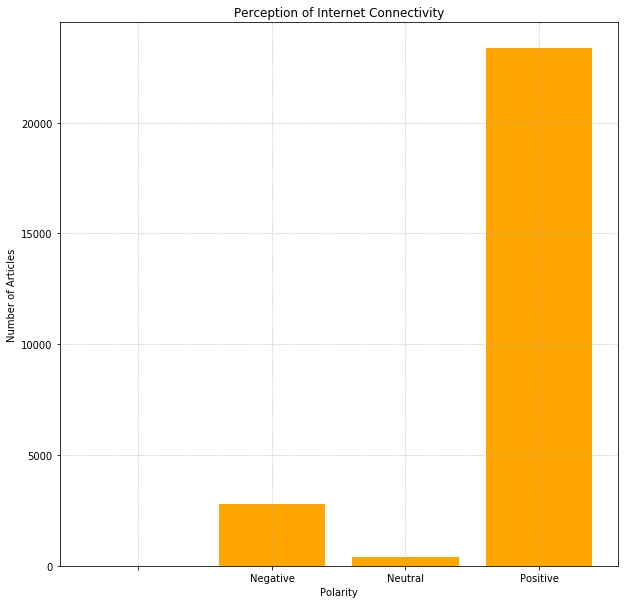

In [154]:
plt.figure(figsize=(10, 10))
plt.xlabel("Polarity")
plt.ylabel("Number of Articles")
plt.title("Perception of Internet Connectivity")
x=lens7[lens7.columns[0]]
y=lens7[lens7.columns[1]]
plt.bar(x, y,color='orange')
plt.grid(which='both', linestyle=':')
plt.savefig('Sentiment_Internet.png')

### Data Query

Now we want to do some data query to learn more about internet connectivity. Since Africa constitutes part of the world that is underserved or uncconnected, it is vital to explore the number of research work from those countries or with the mention of any of them.

We therefore create a list of leading african countries in research.

In [35]:
search_term=['Algeria','Kenya',' Tunisia','Botswana','South Africa',\
             'Egypt','Morocco','Burkina Faso','Uganda','Ghana','Tanzania','Sudan',\
             'Zambia','Côte d’Ivoire','Zimbabwe','Cameroon','Malawi','Nigeria','Ethiopia','Senegal']

In [36]:
lens6["African_Study"]=""
lens6

,Abstract,Language,Sentiment,Polarity,African_Study
0,Abstract With advances in learning technology ...,en,0.266667,Positive,
1,Due to the depletion of energy resources and i...,en,0.0768908,Positive,
2,As gaming culture continues to marginalize wom...,en,0.016369,Positive,
3,We investigate channel assignment for a multic...,en,0.232804,Positive,
4,Background; Moral philosophy and psychology ha...,en,0.0111008,Positive,
...,...,...,...,...,...
26577,WLAN and GPRS are used widely wireless network...,en,0.104103,Positive,
26578,Owing to the fact that WiFi is the cheapest fo...,en,0.0437459,Positive,
26579,Abstract A review of market trends impacting t...,en,-0.0388889,Negative,
26580,BACKGROUND The rise of COVID-19 and the issue ...,en,-0.0250175,,


In [37]:
for i in range(26582):
    if any(str(item) in str(lens6['Abstract'].loc[i]) for item in search_term):
        lens6["African_Study"].loc[i]='Yes'
    else:
        lens6["African_Study"].loc[i]='No'

In [38]:
lens6

,Abstract,Language,Sentiment,Polarity,African_Study
0,Abstract With advances in learning technology ...,en,0.266667,Positive,No
1,Due to the depletion of energy resources and i...,en,0.0768908,Positive,No
2,As gaming culture continues to marginalize wom...,en,0.016369,Positive,No
3,We investigate channel assignment for a multic...,en,0.232804,Positive,No
4,Background; Moral philosophy and psychology ha...,en,0.0111008,Positive,No
...,...,...,...,...,...
26577,WLAN and GPRS are used widely wireless network...,en,0.104103,Positive,No
26578,Owing to the fact that WiFi is the cheapest fo...,en,0.0437459,Positive,No
26579,Abstract A review of market trends impacting t...,en,-0.0388889,Negative,No
26580,BACKGROUND The rise of COVID-19 and the issue ...,en,-0.0250175,,No


Let us query the number of African countries with related research in broandband connectivity.
To do that, we group by the column name, determine the size and then resize the index to re-arrange the rows.

In [146]:
lens8=lens6[lens6.African_Study == 'Yes']

As can be seen from the above results, only 758 publications are from Africa. We therefore, seek to rank the countries according to the number of publications related to broadband internet connectivity. 

In [147]:
country=[]
for line in lens8['Abstract']:
    for i in search_term:
        if i in line:
            country.append(i) 

In [148]:
cnt=Counter()
for i in country:
    cnt[i]+=1
cnt

Counter({'Malawi': 19,
         'South Africa': 136,
         'Nigeria': 217,
         'Ethiopia': 27,
         'Kenya': 121,
         'Sudan': 15,
         'Ghana': 84,
         'Zimbabwe': 30,
         'Morocco': 9,
         'Cameroon': 12,
         'Egypt': 39,
         'Uganda': 45,
         'Tanzania': 63,
         'Zambia': 20,
         'Botswana': 20,
         'Senegal': 10,
         'Burkina Faso': 7,
         ' Tunisia': 14,
         'Algeria': 3})

In [149]:
cnt=pd.DataFrame(list(cnt.items()), columns=['Country', 'Number'])
cnt

,Country,Number
0,Malawi,19
1,South Africa,136
2,Nigeria,217
3,Ethiopia,27
4,Kenya,121
5,Sudan,15
6,Ghana,84
7,Zimbabwe,30
8,Morocco,9
9,Cameroon,12


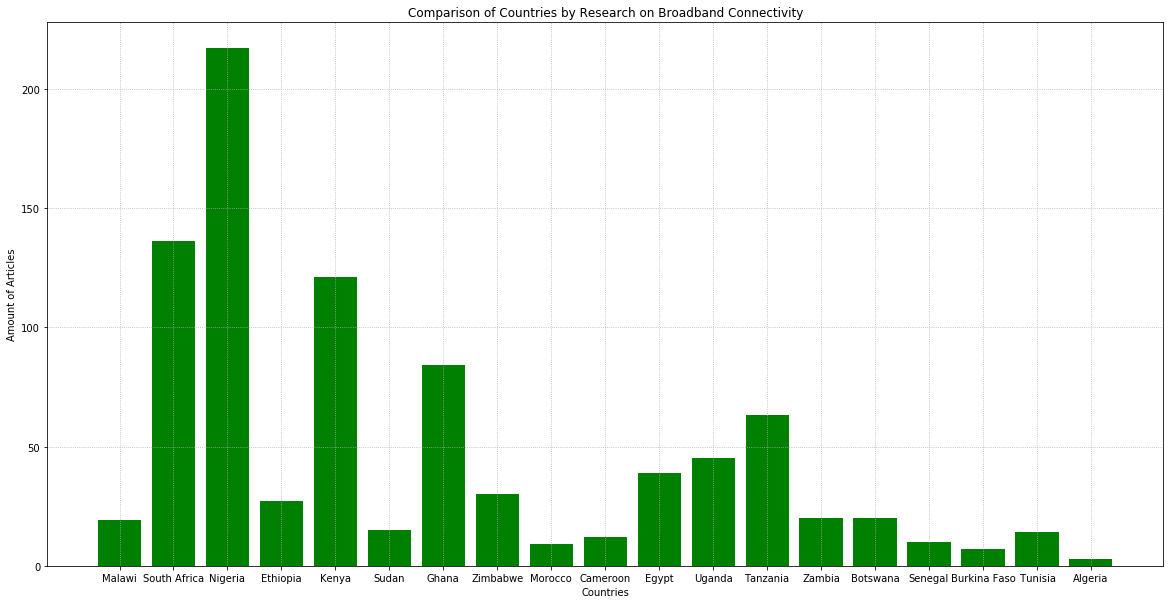

In [151]:
plt.figure(figsize=(20, 10))
plt.xlabel("Countries")
plt.ylabel("Amount of Articles")
plt.title("Comparison of Countries by Research on Broadband Connectivity")
x=cnt[cnt.columns[0]]
y=cnt[cnt.columns[1]]
plt.bar(x, y,color='green')
plt.grid(which='both', linestyle=':')
plt.savefig('Sentiment_popularity.png')